<div style="border:solid Chocolate 2px; padding: 40px">

<b>Привет!</b>

Меня зовут Дмитрий Михаленко, я буду ревьюером твоего проекта. Если ты не против, то предлагаю построить наше общение на "ты" ;) Если удобнее на "вы", то нет проблем, только скажи об этом. 

Ниже в работе ты найдешь мои комментарии - **пожалуйста, не перемещай, не изменяй и не удаляй их**.
    
Для наглядности я буду использовать цветовую разметку:
<font color='green'>зеленого</font>, <font color='gold'>желтого</font> и <font color='red'>красного</font> цветов. Сейчас объясню, что они значат:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Решение на этом шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b> Решение на этом шаге может стать еще лучше, если внести небольшие коррективы.
Но настаивать я не буду.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
Для правильного решения задачи на этом шаге необходимо внести правки. Напоминаю, что проект не может быть принят, без их отработки.
</div>

Для продуктивной работы прошу: **если ты что-то меняешь в проекте или отвечаешь на мои комментарии — пиши об этом**
Мне будет легче отследить изменения, если ты тоже выделишь свои комментарии:
    
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
        
Увидев у тебя ошибку, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой начальник будет поступать так же, а я пытаюсь подготовить тебя именно к работе аналитиком. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку.


    
# Проект "Принятие решений в бизнесе. Приоритезация гипотез и анализ А/В-теста"

Мы являемся аналитиками крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список из 9 гипотез для увеличения выручки.
Приоритизируем гипотезы, запустим A/B-тест и проанализируем результаты. 

<b>Описание данных.</b>

Данные для первой части:
 <b>Файл /datasets/hypothesis.csv.</b>
 - Hypothesis — краткое описание гипотезы;
 - Reach — охват пользователей по 10-балльной шкале;
 - Impact — влияние на пользователей по 10-балльной шкале;
 - Confidence — уверенность в гипотезе по 10-балльной шкале;
 - Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
 
 
Данные для второй части:
 <b>Файл /datasets/orders.csv.</b>
 - transactionId — идентификатор заказа;
 - visitorId — идентификатор пользователя, совершившего заказ;
 - date — дата, когда был совершён заказ;
 - revenue — выручка заказа;
 - group — группа A/B-теста, в которую попал заказ.
 
 
 <b>Файл /datasets/visitors.csv. </b>
 - date — дата;
 - group — группа A/B-теста;
 - visitors — количество пользователей в указанную дату в указанной группе A/B-теста
 
Целью нашей работы является принятие решения по результатам теста. Варианты решений:
1. Остановить тест, зафиксировать победу одной из групп.
2. Остановить тест, зафиксировать отсутствие различий между группами.
3. Продолжить тест.


<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Интересная и творческая аналитическая задача!

## Приоритизация гипотез.
В нашем распоряжении данные о 9 гипотезах для увеличения выручки, подготовленных отделом маркетинга. Нам предстоит приоритизировать гипотезы, запустить A/B тест одной из гипотез и проанализировать результаты.

In [2]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import stats as st
import datetime as dt
import seaborn as sns
from IPython.display import display_html
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_colwidth', -1)
import warnings
warnings.simplefilter('ignore')

/tmp/ipykernel_31/658137425.py:11: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [3]:
# выставляем ограничение на показ знаков после запятой
pd.options.display.float_format = '{:,.3f}'.format

# задаем размер графика
sns.set(rc={'figure.figsize':(9,5)})

In [4]:
# чтение файлов с данными и сохранение в df

try:
    hypothesis, orders, visitors = (
        pd.read_csv('/datasets/hypothesis.csv'),
        pd.read_csv('/datasets/orders.csv'),
        pd.read_csv('/datasets/visitors.csv')
    )


except:
    hypothesis, orders, visitors = (
        pd.read_csv('hypothesis.csv'),
        pd.read_csv('orders.csv'),
        pd.read_csv('visitors.csv')
    )

In [5]:
# посмотрим информацию и данные датафрейма hypothesis

hypothesis.info()
display(hypothesis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [6]:
# посмотрим информацию и данные датафрейма orders

orders.info()
display(orders)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [7]:
# посмотрим информацию и данные датафрейма visitors

visitors.info()
display(visitors)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<b>Выводы.</b>

Мы ознакомились с таблицами. Видим, что пропусков нет, но есть некоторые ошибки: названия столбцов hypothesis нужно привести к нижнему регистру, а также поправить некоторые названия столбцов в едином стиле тип данных в столбцах - object. Так же проверим данные на наличие дубликатов.

Проведем предобработку данных.

### Предобработка данных


In [8]:
# приведем наименования столбцов к единому верному стилю

hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = [name.replace('Id', '_id') for name in orders.columns]

display(hypothesis.columns)
orders.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [9]:
# изменим тип данных для столбцов с датами для visitors и orders

visitors['date'] = pd.to_datetime(visitors['date'])
orders['date'] = pd.to_datetime(orders['date'])

In [10]:
# проверяем таблицы на наличие дубликатов

display(visitors.duplicated().sum())
orders.duplicated().sum()

0

0

<b>Выводы.</b>
Дубликатов нет, названия столбцов, а также типы данных приведены в порядок. 

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Последовательная и качественная предобработка, так держать!

## Приоритезация гипотез
Вместе с отделом маркетинга мы подготовили список из 9 гипотез для увеличения выручки.
Выполним приоритизацию гипотез, кыкаждый компонент которой оценен по шкале от 0 до 10.

Применим для начала метод приоритезации гипотез - ICE (от. англ.: Impact, Confidence, Effort/ Влияние, Уверенность, Усилия).

In [11]:
hypothesis['ice'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


При применении метода ICE мы видим, что значительно лидирует гипотеза "Запустить акцию, дающую скидку на товар в день рождения".
Посмотрим на приоритезацию по методу RICE. 

In [12]:
hypothesis['rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

hypothesis[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000


<b>Выводы.</b>
Итак, с использованием метода RICE рейтинг гипотез совершенно поменялся, по этому методу мы видим в лидерах с огромным приемуществом акцию "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок". 
Мы видим большие отличия в результатах применения двух этих методов, потому что в методе RICE добавляется параметр - охват(REACH), который существенно меняет картину. Соответственно, учитывая количество пользователей, которых затронут изменения, будет целесообразней проверять другие гипотезы.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Приоритезация сделана верно и влияние охвата на фреймворки описано! Молодец, что выводишь названия гипотез полностью, а в выводах используешь не только индексы, но и их названия . Таким методом ты исключаешь разночтение данных у пользователей.

## Анализ A/B-теста - кумулятивные метрики.

Мы провели A/B-тест и получили результаты, которые описаны в файлах ab-orders.csv и ab-visitors.csv. Для начала нам нужно собрать датафрейм с агрегированными кумулятивными по дням данными о заказах, пользователях, сделавших эти заказы, среднем чеке и количестве посетителей магазина. По ним сможем построить графики для визуализации.

In [13]:
# создаем массив уникальных пар значений дат и групп теста
dates_grouped = orders[['date', 'group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
orders_grouped = dates_grouped.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

orders_grouped.head(6)

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874
310,2019-08-03,B,61,59,380996


In [14]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 

visitors_grouped = dates_grouped.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', 
            'group': 'max', 
            'visitors': 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitors_grouped.head(6)

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
310,2019-08-03,B,1803


In [15]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам более подходящие названия

cumulative_data = orders_grouped.merge(
    visitors_grouped, 
    left_on=['date', 'group'], 
    right_on=['date', 'group']
)

cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [16]:
# добавим также колонку с конверсией

cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']
cumulative_data.head(6)

,date,group,orders,buyers,revenue,visitors,conversion
0,2019-08-01,A,24,20,148579,719,0.033
1,2019-08-01,B,21,20,101217,713,0.029
2,2019-08-02,A,44,38,242401,1338,0.033
3,2019-08-02,B,45,43,266748,1294,0.035
4,2019-08-03,A,68,62,354874,1845,0.037
5,2019-08-03,B,61,59,380996,1803,0.034


<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Уникальные пары сформированы

### График кумулятивной выручки по дням и группам А/В-тестирования

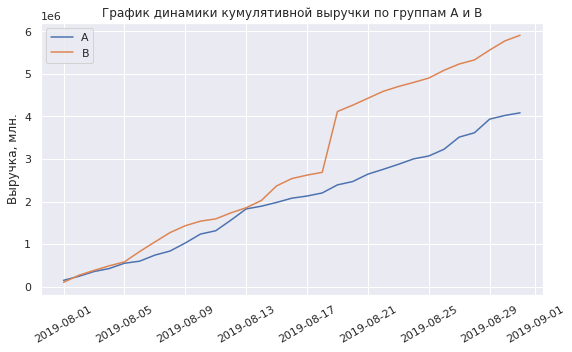

In [17]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

# строим графики выручки по группам А и В
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')
plt.title('График динамики кумулятивной выручки по группам А и В')
plt.ylabel("Выручка, млн.")
plt.xticks(rotation=30)
plt.legend()
plt.show()

<b>Выводы.</b>
По графику видим, что выручка группы А ниже, чем у группы В, и выручка А растет плавно и линейно, а у В произошел резкий скачок 18-19 августа, что может означать, что были всплески числа заказов или появились очень дорогие крупные заказы.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Общий тренд и зона аномальных выбросов описаны верно! Молодец, что предположила причину их появления

### График кумулятивного среднего чека по группам - разделим кумулятивную выручку на кумулятивное число заказов

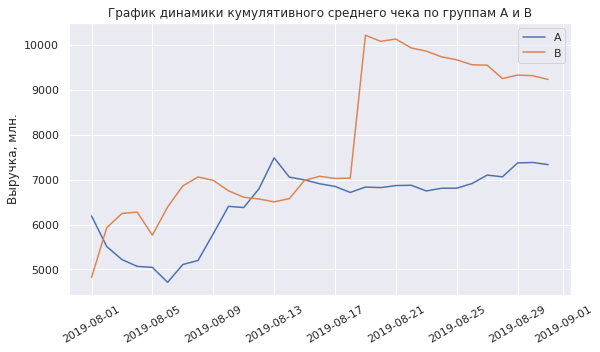

In [18]:
plt.plot(cumulative_revenue_a['date'], 
         cumulative_revenue_a['revenue'] / cumulative_revenue_a['orders'],
         label='A')

plt.plot(cumulative_revenue_b['date'], 
         cumulative_revenue_b['revenue'] / cumulative_revenue_b['orders'], 
         label='B')

plt.title('График динамики кумулятивного среднего чека по группам А и В')
plt.ylabel("Выручка, млн.")
plt.xticks(rotation=30)
plt.legend()
plt.show()

<b>Выводы.</b>
По графику видим, что к концу теста средний чек группы А стабилизируется, а вот средний чек группы В имеет резкий скачок, что может означать, что наше предположение о дорогих заказах 18-19 августа имеет место быть.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Полностью согласен

### График относительного изменения кумулятивного среднего чека группы В к группе А.

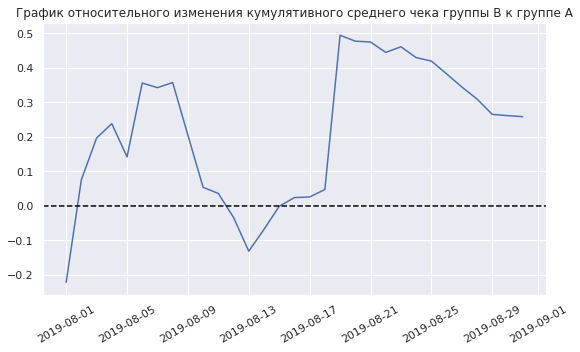

In [19]:
# собираем данные в одном датафрейме
cumulative_revenue_ab = cumulative_revenue_a.merge(
    cumulative_revenue_b, 
    left_on='date', 
    right_on='date', 
    how='left', 
    suffixes=['_a', '_b']
)

# cтроим отношение средних чеков
plt.plot(cumulative_revenue_ab['date'], 
         (
             cumulative_revenue_ab['revenue_b']/cumulative_revenue_ab['orders_b']
         )/
         (
             cumulative_revenue_ab['revenue_a']/cumulative_revenue_ab['orders_a']
         )-1
        )

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xticks(rotation=30)
plt.show()


<b>Выводы.</b>
В нескольких точках график различия между сегментами резко "скачет" - определённо, имеют место какие-то выбросы и крупные заказы. Также обратим внимание, что график в основном находится выше нулевого уровня, что говорит о потенциальном преимуществе группы В.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1<a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b>Согласен, также стоит отметить, что график в основном находился выше 0 уровня, что говорит о потенциальном преимуществе группы В 

<div class="alert alert-info"> <b>Комментарий студента:</b> Согласна. Поправила выше.</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Рад помочь)

### График кумулятивной конверсии (среднего количества заказов на поселителя) по группам А и В.

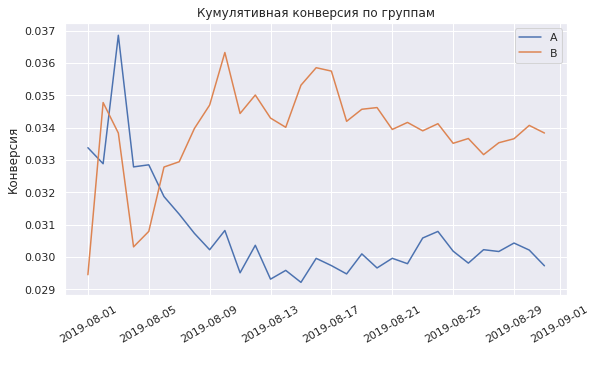

In [22]:
# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# строим графики
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B')
plt.legend()
plt.title('Кумулятивная конверсия по группам')
plt.xlabel(' ')
plt.ylabel('Конверсия')
plt.xticks(rotation=30)
plt.show()

<b>Выводы.</b>
Сначала конверсия резко скакала, но к концу теста выравнивается, по группе В конверсия сильно выше, чем по группе А.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Верно

### График относительного изменение кумулятивной конверсии группы B к группе A

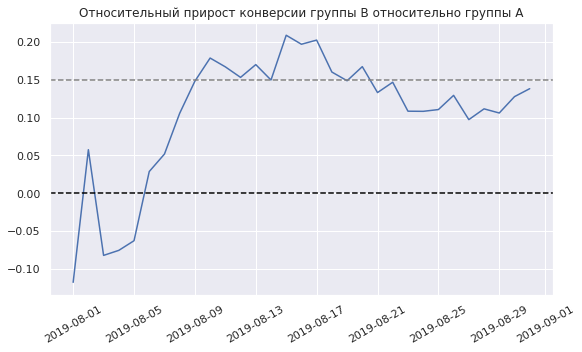

In [23]:
cumulative_conversions_ab = (
    cumulative_data_a[['date','conversion']]
    .merge(
        cumulative_data_b[['date','conversion']], 
        left_on='date', 
        right_on='date', 
        how='left', 
        suffixes=['_a', '_b']
    )
)
plt.plot(
    cumulative_conversions_ab['date'], 
    cumulative_conversions_ab['conversion_b']/
    cumulative_conversions_ab['conversion_a']-1
)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('Относительный прирост конверсии группы B относительно группы A')
plt.xticks(rotation=30)
plt.show()

<b>Выводы.</b>
В начале теста группа В проигрывала группе А, но затем вырвалась вперед. Ее конверсия стремительно росла, далее начался медленный спад. Теперь конверсия группы В снова растет.
Но мы помним, что графики выше сигнализировали нам о наличии крупных заказов.
Необходимо посмотреть аномалии, возможно, без них картина изменится.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Корректная интерпретация результатов.

### График количества заказов по пользователям.

In [23]:
orders_by_users = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
orders_by_users.columns =  ['visitor_id', 'orders']
display(orders_by_users['orders'].describe())

count   1,031.000
mean    1.161    
std     0.725    
min     1.000    
25%     1.000    
50%     1.000    
75%     1.000    
max     11.000   
Name: orders, dtype: float64

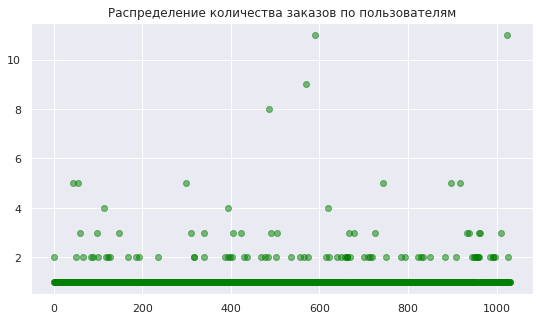

In [25]:
x_values = pd.Series(range(0,len(orders_by_users)))

# строим точечную диаграмму
plt.scatter(x_values, orders_by_users['orders'], color='green', alpha=0.5)
plt.title('Распределение количества заказов по пользователям')
plt.show()

<b>Выводы.</b>
По гистограмме хорошо видно, что большинство пользователей оформляли заказ один раз, но есть и те, кто сделал за месяц 11 заказов. Как правило, пользователь совершает один-два заказа в короткий срок (если только речь не идет о сайтах с регулярным спросом (например, продуктовый магазин)). На точечном графике мы видим, что также много пользователей, сделавших 2-3 заказа.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера v1<a class="tocSkip"> </h2>
    
<b>Небольшие замечания и рекомендации💡:</b>Здесь и ниже построение точечной диаграммы считаю избыточным в данном случае. Диаграмма рассеяния  более наглядно отражает результаты и ее достаточно для принятия решения

<div class="alert alert-info"> <b>Комментарий студента:</b> Согласна. Удалила гистограмму, оставила только "скаттер".</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Логичное решение

### Подсчет 95-й и 99-й перцентили количества заказов на пользователя и выберем границу для определения аномальных пользователей.

In [26]:
np.percentile(orders_by_users['orders'], [95, 99])

array([2., 4.])

<b>Выводы.</b>
То есть не более 5% пользователей совершали больше 2-х покупок в течение тестирования. И только 1% - четыре и более.
Примем за верхнюю границу 4 заказа на одного пользователя.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Обоснованное решение по выбору границы фильтрации

### График стоимостей заказов.

In [24]:
display(orders['revenue'].describe())

count   1,197.000    
mean    8,348.006    
std     39,191.132   
min     50.000       
25%     1,220.000    
50%     2,978.000    
75%     8,290.000    
max     1,294,500.000
Name: revenue, dtype: float64

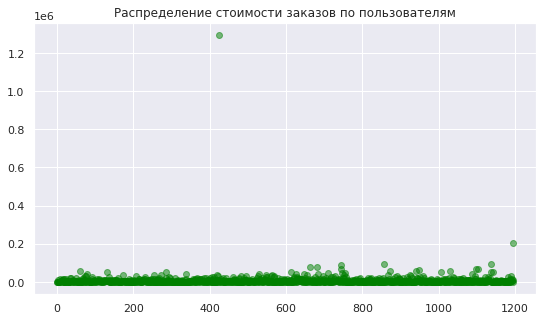

In [28]:
x_values = pd.Series(range(0,len(orders['revenue'])))

# строим точечную диаграмму
plt.scatter(x_values, orders['revenue'], color='green', alpha=0.5)
plt.title('Распределение стоимости заказов по пользователям')
plt.show()

Опять мы видим этот гигантский заказ, который вызвал всплеск на графиках кумулятивных метрик, а так же другие весомые заказы, которые могут повлиять на результат исследований. Скорее всего, именно он причина "скачка" на графиках. Пострим аналогичный график без двух крупных выбросов, которые заметили выше.

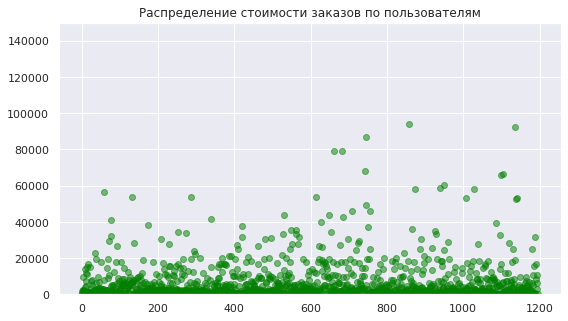

In [29]:
# строим точечную диаграмму
plt.ylim(0, 150000)
plt.scatter(x_values, orders['revenue'], color='green', alpha=0.5)
plt.title('Распределение стоимости заказов по пользователям')
plt.show()

<b>Выводы.</b>
На точечном графике мы увидели выброс - заказ стоимостью 1,3 млн! Без него картина на графике яснее, очевидно, что стоимость большинства заказов не была выше 20 тыс.

### Подсчет 95-й и 99-й перцентили стоимости заказов и выберем границу для определения аномальных пользователей.

In [30]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


<b>Выводы.</b>
Лишь не более 1% заказали на 58233, и не более 5% - на 28000. Установим границу по величине 99% перцентиля (58233).

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>И по стоимости заказо все тоже логично)

### Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по "сырым" данным, то есть без удаления аномальных значений.

Введем основную и альтернативные гипотезы:

 - H0 : различий в конверсии между группами нет
 - H1 : различия в конверсии между группами есть
 

Примем уровень значимости альфа равным 0.05.
Так как данные о продажах и средних чеках редко бывают нормально распределены (это классический пример переменных, подверженных выбросам), для проверки гипотез будем использовать непараметрический тест Уилкоксона-Манна-Уитни.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Нулевая и альтернативная гипотезы сформулированы

In [31]:
visitors_daily_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_daily_a.columns = ['date', 'visitors_per_date_a']

visitors_cummulative_a = visitors_daily_a.apply(
    lambda x: visitors_daily_a[visitors_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_a.columns = ['date', 'visitors_cummulative_a']

visitors_daily_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_daily_b.columns = ['date', 'visitors_per_date_b']

visitors_cummulative_b = visitors_daily_b.apply(
    lambda x: visitors_daily_b[visitors_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_b.columns = ['date', 'visitors_cummulative_b']

orders_daily_a = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_a.columns = ['date', 'orders_daily_a', 'revenue_per_date_a']

orders_cummulative_a = orders_daily_a.apply(
    lambda x: orders_daily_a[orders_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'orders_daily_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cummulative_a.columns = ['date','orders_cummulative_a','revenue_cummulative_a']

orders_daily_b = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_b.columns = ['date', 'orders_daily_b', 'revenue_per_date_b']

orders_cummulative_b = orders_daily_b.apply(
    lambda x: orders_daily_b[orders_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'orders_daily_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cummulative_b.columns = ['date','orders_cummulative_b','revenue_cummulative_b']


data = (
    orders_daily_a.merge(
        orders_daily_b, left_on='date', right_on='date', how='left'
    )
    .merge(orders_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(orders_cummulative_b, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_a, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_b, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_b, left_on='date', right_on='date', how='left')
)

data.head(6)

,date,orders_daily_a,revenue_per_date_a,orders_daily_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280
5,2019-08-06,18,48484,28,242342,127,598401,129,824337,667,655,3985,3935


Итак, у нас получилсь следующая таблица.

 - date — дата;
 - orders_daily_a — количество заказов в выбранную дату в группе A;
 - revenue_per_date_a — суммарная выручка в выбранную дату в группе A;
 - orders_daily_a — количество заказов в выбранную дату в группе B;
 - revenue_per_date_a — суммарная выручка в выбранную дату в группе B;
 - orders_cummulative_a — суммарное число заказов до выбранной даты включительно в группе A;
 - revenue_cummulative_a — суммарная выручка до выбранной даты включительно в группе A;
 - orders_cummulative_b — суммарное количество заказов до выбранной даты включительно в группе B;
 - revenue_cummulative_b — суммарная выручка до выбранной даты включительно в группе B;
 - visitors_per_date_a — количество пользователей в выбранную дату в группе A;
 - visitors_per_date_b — количество пользователей в выбранную дату в группе B;
 - visitors_cummulative_a — количество пользователей до выбранной даты включительно в группе A;
 - visitors_cummulative_b — количество пользователей до выбранной даты включительно в группе B.

Создадим переменные orders_by_users_a и orders_by_users_a; в них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов.

In [32]:
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

Объявим переменные sample_a и sample_b, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [33]:
sample_a = pd.concat([orders_by_users_a['orders'],
                      pd.Series(
                          0, 
                          index=np.arange(data['visitors_per_date_a'].sum() - 
                                          len(orders_by_users_a['orders'])), 
                          name='orders')],axis=0
                    )

sample_b = pd.concat([orders_by_users_b['orders'],
                      pd.Series(
                          0, 
                          index=np.arange(data['visitors_per_date_b'].sum() - 
                                          len(orders_by_users_b['orders'])), 
                          name='orders')],axis=0
                    )

Задаем функцию, в которой:

 - зададим уровень значимости alpha=0.05,
 - применим критерий Манна-Уитни,
 - отформатируем p-value, округлив его до трёх знаков после запятой,
 - выведем относительный прирост конверсии группы B: конверсия группы B / конверсия группы A - 1, округлив до трёх знаков после запятой.

In [38]:
# Функция для проверки гипотезы о равенстве групп data A и data B
def stat_significance(data_a, data_b):
    alpha = 0.05
    p_value = stats.mannwhitneyu(data_a, data_b)[1]
    print("P-value: {0:.3f}".format(p_value))

    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
    print("Относительный прирост В к А: {0:.3%}".format(data_b.mean() / data_a.mean()-1))

In [42]:
stat_significance(sample_a, sample_b)

P-value: 0.017
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 13.808%


<b>Выводы.</b>
По неочищенным данным различия в конверсии между группами есть.
P-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет, отвергаем. Относительный выигрыш группы B равен 13.81%.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Тест и его интерпретацию проводишь последовательно и правильно! 

### Подсчет статистической значимости различий в среднем чеке заказа между группами по "сырым" данным.

Введем основную и альтернативные гипотезы:

 - H0 : различий в среднем чеке между группами нет
 - H1 : различия в среднем чеке между группами есть
 

Уровень значимости: 0.05.

Чтобы рассчитать статистическую значимость различий в среднем чеке, передадим критерию mannwhitneyu() данные о выручке с заказов. А ещё найдём относительные различия в среднем чеке между группами.

In [43]:
stat_significance(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

P-value: 0.729
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный прирост В к А: 25.871%


<b>Выводы.</b>
P-value больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B выше среднего чека группы A.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1<a class="tocSkip"></h2>

<b>На доработку🤔:</b> При оценке статистических показателей стоит воздержаться от оценочных суждений типа "значительно". Ведь нельзя точно сказать с какого моента настанет  "значительно"

<div class="alert alert-info"> <b>Комментарий студента:</b> Согласна. Поправила выше.</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Теперь все абсолютно верно!

### Подсчет статистической значимости различий в среднем количестве заказов на посетителя между группами по "очищенным" данным, то есть после удаления аномальных значений.

 - Примем за аномальных пользователей тех, кто совершил от 5 заказов или совершил заказ дороже 58233. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% пользователей с дорогими заказами. Сделаем срезы пользователей с числом заказов больше 4 — users_with_many_orders и пользователей, совершивших заказы дороже 58233 — users_with_expensive_orders. Объединим их в таблице abnormal_users.
 - Узнаем, сколько всего аномальных пользователей методом shape().

In [44]:
many_orders = np.percentile(orders_by_users['orders'], 99)
expensive_orders = np.percentile(orders['revenue'], 99)


users_with_many_orders = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > many_orders]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > many_orders]['visitor_id'],
    ],
    axis=0,
)


users_with_expensive_orders = orders[orders['revenue'] > expensive_orders]['visitor_id']


abnormal_users = (
    pd.concat([users_with_many_orders, users_with_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormal_users.head(5))
abnormal_users.shape[0]

1099    148427295 
949     887908475 
744     888512513 
1103    1164614297
1136    1307669133
Name: visitor_id, dtype: int64

15

Всего 15 аномальных пользователей.
Узнаем, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Молодец, что используешь переменные и процентили напрямую для фильтрации пользователей. Так в случае корректировки исходных данных не придется менять код)

In [46]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
stat_significance(sample_a_filtered, sample_b_filtered)

P-value: 0.014
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 15.331%


<b>Выводы.</b>
На очищенных данных разница в конверсии между группами есть, а относительный прирост конверсии группы В отнистельно группы А увеличился на 15.3%.

<div class="alert alert-success">
<h2> Комментарий ревьюера v1 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>Все верно. Наблюдаем увеличение прироста на 2 %, что очень хорошо для бизнеса

### Подсчет статистической значимости различий в среднем чеке заказа между группами по "очищенным" данным.

In [47]:
stat_significance(
    orders[(orders['group']=='A') & np.logical_not(orders['visitor_id'].isin(abnormal_users))]['revenue'], 
    orders[(orders['group']=='B') & np.logical_not(orders['visitor_id'].isin(abnormal_users))]['revenue']
                  )

P-value: 0.851
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный прирост В к А: -0.575%


<b>Выводы.</b>
P-value больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. По разнице средних чеков групп различий практически нет.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1<a class="tocSkip"></h2>

<b>На доработку🤔:</b> Повторюсь про "значительно"

<div class="alert alert-info"> <b>Комментарий студента:</b> Согласна. Поправила выше.</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b>И тут тоже)

## Общий вывод и рекомендации.

Итак, нами была проделана работа в 2 этапа. Первый - приоритезация гипотез и второй - анализ А/В-тестирования. Исходя из этого делаем следующие выводы.

### По приоритизации гипотез из списка, составленного с отделом маркетинга:

Если мы пользуемся методом ICE, то есть охват пользователей не учитываем, то топ-три гипотез для проверки выглядит так:
 - "Запустить акцию, дающую скидку на товар в день рождения",
 - "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",
 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок";
 
 Если же мы учитываем Reach(охват пользователей магазина), то эти три гипотезы нужно рассмотреть в первую очередь:
 - "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",
 - "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",
 - "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей".


### По анализу А/В-тестирования:

 - Мы смотрели данные до удаления выбросов, и после. Увидели, что есть статистически значимое различие по конверсии между группами как по «сырым», так и по данным после фильтрации аномалий. Конверсия группы В выше, чем в А, на 14-15%;

 - Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по «очищенным» данным. При этом средний чек группы В выше (на "очищенных" данных примерно на 2%);

 - График относительного изменения кумулятивной конверсии группы B к группе A показывает, что результаты группы В стабильно лучше группы А;

<b>Вывод.</b>На основании вышеизложенного рекомендуем <b>остановить тест, зафиксировав победу группы B</b> на основании того, что ее конверсия выше конверсии группы А.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера v1<a class="tocSkip"></h2>

<b>На доработку🤔:</b> Сформулировано верное и обоснованное решение по тесту! но повторюсь про "значительно"

<div class="alert alert-info"> <b>Комментарий студента:</b> Согласна. Поправила выше.</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 <a class="tocSkip"> </h2>

<b>Все супер!👍:</b> Людмила, проект был на простой, но ты классно справилась! У тебя отличные аналитические способности и владение инструментарием.
    
Итоговый вывод полностью отражает все этапы твоего исследования и достигнутые результаты.

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера**:
     Людмила, спасибо за  проект! Ты приложила много усилий, чтобы довести его до конца, проделана огромная работа, и это видно невооруженным глазом, ты молодец! Но у меня осталось несколько  дополнений с которыми проект может стать еще лучше.
    
**Отмечу положительные моменты**:
    
    1. Все разложено по полочкам, всегда понятен ход твоих мыслей, приятно смотреть
    
    2. Ёмкие и понятные выводы.
    
    3. Отличные визуализации
       
    
**На что стоит обратить внимание**:    
       
    1. Небольшая доработка выводов в А/В тестировании 
    
    
**Удачи и жду твой проект на повторное ревью!**
    
    

<div style="border:solid Chocolate 2px; padding: 40px">
    
**Общий вывод по проекту ревьювера V2**:
     Все недочеты исправлены, проект зачтен. Поздравляю тебя, увидимся в практикуме!